In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function for generating the GMM data

$X_i = (1-W_i)Y_{1i}+W_iY_{2i}$

$W_i$ is Bernoulli with parameter $\pi=P(0)$.

$Y_{1i}, Y_{2i} \sim N(\mu_1,\sigma_1^2), N(\mu_2,\sigma_2^2)$

$\theta = [\pi, \mu_1, \mu_2, \sigma_1, \sigma_2]^T$

In [3]:
def generate_gmm_data(n,theta):
    '''
    n: Number of samples
    theta: parameter vector.
    Returns row of size n, whose data is generated by the equation in above Markup cell.
    '''
    pi_ = theta[0]
    mu1 = theta[1]
    mu2 = theta[2]
    sigma1 = theta[3]
    sigma2 = theta[4]
    
    W = np.greater(np.random.rand(n),pi_*np.ones(n))
    Y1 = mu1+sigma1*np.random.randn(n)
    Y2 = mu2+sigma2*np.random.randn(n)
    X = (1-W)*Y1+W*Y2
    
    return X

# The Expectation Maximisation Algorithm

Notation:

$\gamma_{nk} = P(W=k|X_n=x_n)$.

Here $k = 1,2$ since it is a two component Gaussian Mixture Model.

$\mu_1, \sigma_1^2$ are assumed mean and variances for component 1.

$\mu_2, \sigma_2^2$ are assumed mean and variances for component 2.


EM-Algorithm:

E-step:

$\gamma_{n,1} = \frac{(1-\pi_{old})N(x_n|\mu_{1,old},\sigma_{1,old}^2)}{(1-\pi_{old})N(x_n|\mu_{1,old},\sigma_{1,old}^2)+\pi_{old} N(x_n|\mu_{2,old},\sigma_{2,old}^2)}$

$\gamma_{n,2} = \frac{\pi_{old} N(x_n|\mu_{2,old},\sigma_{2,old}^2)}{(1-\pi_{old})N(x_n|\mu_{1,old},\sigma_{1,old}^2)+\pi_{old} N(x_n|\mu_{2,old},\sigma_{2,old}^2)}$

M Step:

$N_k = \sum_n \gamma_{n,k}$

$\mu_{k,new} = \frac{\sum_n \gamma_{n,k} x_n}{N_k}$

$\sigma_{k, new}^2 = \frac{\sum_n \gamma_{n,k} (x_n-\mu_k)^2}{N_k}$

$\pi_{new} = \frac{N_1}{N_1+N_2}$

For question 1, we are asked to not update $\pi$ and assume the value given in each of the subparts. For this we add a flag and depending on the value of the flag, the program may or may not update $\pi$


In [79]:
def run_em_algorithm(X,theta_init,flag_pi_update=True,tol=1e-6):
    '''
    X: row of size n, whose data is assumed to generated from GMM
    theta_init: Initial guess for the parameter
    flag_pi_update: If true, allow pi to be updated. If False, pi stays static.
    tol: Tolerance in error

    Returns:
    theta_list: A list containing the values for the parameters with iterations.
    The last row of the list contains the final values of the estimated parameters, when the desired tolerance is reached,
    while we need the entire list to plot the evolution of estimates with iterations.
    In an element of list theta_list[i], which denotes the estimated parameters at ith iteration:
    theta_list[i][0]: Estimate of \pi at ith iteration.
    theta_list[i][1]: Estimate of \mu_1 at ith iteration
    theta_list[i][2]: Estimate of \mu_2 at ith iteration
    theta_list[i][3]: Estimate of \sigma_1 at ith iteration
    theta_list[i][4]: Estimate of \sigma_2 at ith iteration

    err_list: A list containing values of error with iterations
    '''
    theta_list = []
    err_list = []
    theta_list.append(theta_init)
    err = tol+1
    #print(theta_init)
    
    if flag_pi_update==True:
        while(err>tol):
            pi_current = theta_list[-1][0]
            mu1_current = theta_list[-1][1]
            mu2_current = theta_list[-1][2]
            sigma1_current = theta_list[-1][3]
            sigma2_current = theta_list[-1][4]
            
            #E step:
            gamma_z_n1 = (1-pi_current)*np.exp(-0.5*((X-mu1_current)**2)/(sigma1_current**2))
            gamma_z_n1 *= (1/sigma1_current)
            
            gamma_z_n2 = pi_current*np.exp(-0.5*((X-mu2_current)**2)/(sigma2_current**2))
            gamma_z_n2*=(1/sigma2_current)
                        
            sum_gamma = gamma_z_n1+gamma_z_n2
            
            gamma_z_n1/=sum_gamma
            gamma_z_n2/=sum_gamma
            
            #M step
            N1 = np.sum(gamma_z_n1)
            N2 = np.sum(gamma_z_n2)
            
            mu1_new = (1/N1)*(np.sum(gamma_z_n1*X))
            mu2_new = (1/N2)*(np.sum(gamma_z_n2*X))
            
            sigma1_new = np.sqrt((1/N1)*np.sum(gamma_z_n1*((X-mu1_new)**2)))
            sigma2_new = np.sqrt((1/N2)*np.sum(gamma_z_n2*((X-mu2_new)**2)))
            
            pi_new = N1/(N1+N2)
            
            theta_new = np.array([pi_new,mu1_new,mu2_new,sigma1_new,sigma2_new])
            
            err = np.max(np.abs(theta_new-theta_list[-1]))
            theta_list.append(theta_new)
            #print(theta_new)
            err_list.append(err)
            
    else:
        while(err>tol):
            pi_current = theta_list[-1][0]
            mu1_current = theta_list[-1][1]
            mu2_current = theta_list[-1][2]
            sigma1_current = theta_list[-1][3]
            sigma2_current = theta_list[-1][4]
            
            #E step:
            gamma_z_n1 = (1-pi_current)*np.exp(-0.5*((X-mu1_current)**2)/(sigma1_current**2))
            gamma_z_n1*=(1/sigma1_current)
            
            gamma_z_n2 = pi_current*np.exp(-0.5*((X-mu2_current)**2)/(sigma2_current**2))
            gamma_z_n2*=(1/sigma2_current)
            
            sum_gamma = gamma_z_n1+gamma_z_n2
            
            gamma_z_n1/=sum_gamma
            gamma_z_n2/=sum_gamma
            
            #M step
            N1 = np.sum(gamma_z_n1)
            N2 = np.sum(gamma_z_n2)
            
            mu1_new = (1/N1)*(np.sum(gamma_z_n1*X))
            mu2_new = (1/N2)*(np.sum(gamma_z_n2*X))
            
            sigma1_new = np.sqrt((1/N1)*np.sum(gamma_z_n1*(X-mu1_new)**2))
            sigma2_new = np.sqrt((1/N2)*np.sum(gamma_z_n2*(X-mu2_new)**2))
            
            pi_new = pi_current
            
            theta_new = np.array([pi_new,mu1_new,mu2_new,sigma1_new,sigma2_new])
            
            err = np.max(np.abs(theta_new-theta_list[-1]))
            theta_list.append(theta_new)
            #print(theta_new)
            err_list.append(err)
    
    #theta_list = theta_list[1:]
    return theta_list, err_list

### Two Cases for Generating Observations, $x^{(i)}$

<br>
(i) $\pi = 0.50, \mu_1 = 0.0, \mu_2 = 1.0, \sigma_1 = 0.8, \sigma_2 = 0.4$<br><br>
(ii) $\pi = 0.10, \mu_1 = 0.0, \mu_2 = 1.0, \sigma_1 = 0.8, \sigma_2 = 0.4$




In [5]:
n_vector = [10, 1000, 10000]

### Experiment 1: Effect of not knowing mixing fraction properly
Note the format of reporting the estimates = $\theta$ = $[\pi \; \mu_1 \; \mu_2 \; \sigma_1 \; \sigma_2]$
<br><br>
#### (a) Use observations from case (i) and assume that $\pi$ = 0.50 and initial estimates of $\mu_1$ = 0.1, $\mu_2$ = 0.8, $\sigma_1$ = 0.9, $\sigma_2$ = 0.3 




In [81]:
theta_case_1 = [0.5, 0, 1, 0.8, 0.4] # True values
theta_init = [0.5,0.1,0.8,0.9,0.3]
theta_est_1a = []
err_est_1a = []

for n_value in n_vector:
    X = generate_gmm_data(n_value, theta_case_1)
    theta_est, err_est = run_em_algorithm(X, theta_init ,flag_pi_update=False)
    theta_est_1a.append(theta_est)
    err_est_1a.append(err_est)
    print("For n =", n_value, "\t estimates =",\
          theta_est[-1])

For n = 10 	 estimates = [ 0.5        -0.31533115  1.00386367  0.64013209  0.17447854]
For n = 1000 	 estimates = [0.5        0.00104546 0.97643184 0.85647886 0.39475297]
For n = 10000 	 estimates = [0.5        0.01939424 1.00399917 0.81373306 0.39581756]


In [88]:
def plotter_1(theta_est,error_est, true_theta):
  stack_1 = np.array(np.vstack(theta_est[0]))
  stack_2 = np.array(np.vstack(theta_est[1]))
  stack_3 = np.array(np.vstack(theta_est[2]))
  stack_4 = np.array(np.vstack(error_est[0]))
  stack_5 = np.array(np.vstack(error_est[1]))
  stack_6 = np.array(np.vstack(error_est[2]))

  fig, ax = plt.subplots(5,figsize=(6,10))
  fig.subplots_adjust(bottom = 12,top= 14)
  n = max(len(stack_1), len(stack_2), len(stack_3))

  ax[0].plot(stack_1[:,1], label = 'N=10')
  ax[0].plot(stack_2[:,1], label = 'N=1000')
  ax[0].plot(stack_3[:,1], label = 'N=10000')
  ax[0].plot(np.ones(n)*true_theta[1], linestyle='dashed', label = '$\mu_{1}$')
  ax[0].set_xlabel('Number of iterations')
  ax[0].set_ylabel(r'$\mu_{1}$')
  #ax[0].set_title('N=10')
  ax[0].legend()

  ax[1].plot(stack_1[:,2], label = 'N=10')
  ax[1].plot(stack_2[:,2], label = 'N=1000')
  ax[1].plot(stack_3[:,2], label = 'N=10000')
  ax[1].plot(np.ones(n)*true_theta[2], linestyle='dashed', label = '$\mu_{2}$')
  ax[1].set_xlabel('Number of iterations')
  ax[1].set_ylabel(r'$\mu_{2}$')
  #ax[1].set_title('$\mu_{2}$'')
  ax[1].legend()

  ax[2].plot(stack_1[:,3], label = 'N=10')
  ax[2].plot(stack_2[:,3], label = 'N=1000')
  ax[2].plot(stack_3[:,3], label = 'N=10000')
  ax[2].plot(np.ones(n)*true_theta[3], linestyle='dashed', label = '$\sigma_{1}$')
  ax[2].set_xlabel('Number of iterations')
  ax[2].set_ylabel(r'$\sigma_{1}$')
  #ax[2].set_title('N=10')
  ax[2].legend()

  ax[3].plot(stack_1[:,4], label = 'N=10')
  ax[3].plot(stack_2[:,4], label = 'N=1000')
  ax[3].plot(stack_3[:,4], label = 'N=10000')
  ax[3].plot(np.ones(n)*true_theta[4], linestyle='dashed', label = '$\sigma_{2}$')
  ax[3].set_xlabel('Number of iterations')
  ax[3].set_ylabel(r'$\sigma_{2}$')
  #ax[3].set_title('N=10')
  ax[3].legend()
  
  #ax[4].plot(np.log10(stack_4), label = 'N=10')
  #ax[4].plot(np.log10(stack_5), label = 'N=1000')
  #ax[4].plot(np.log10(stack_6), label = 'N=10000')
  #ax[4][0].plot(np.ones(n)*true_theta[4], linestyle='dashed', label = '$\sigma_{2}$')
  ax[4].semilogy(stack_4, label = 'N=10')
  ax[4].semilogy(stack_5, label = 'N=1000')
  ax[4].semilogy(stack_6, label = 'N=10000')
  ax[4].set_xlabel('Number of iterations')
  ax[4].set_ylabel('Convergence loss')
  #ax[4].set_title('N=10')
  ax[4].legend()
  
  plt.show()


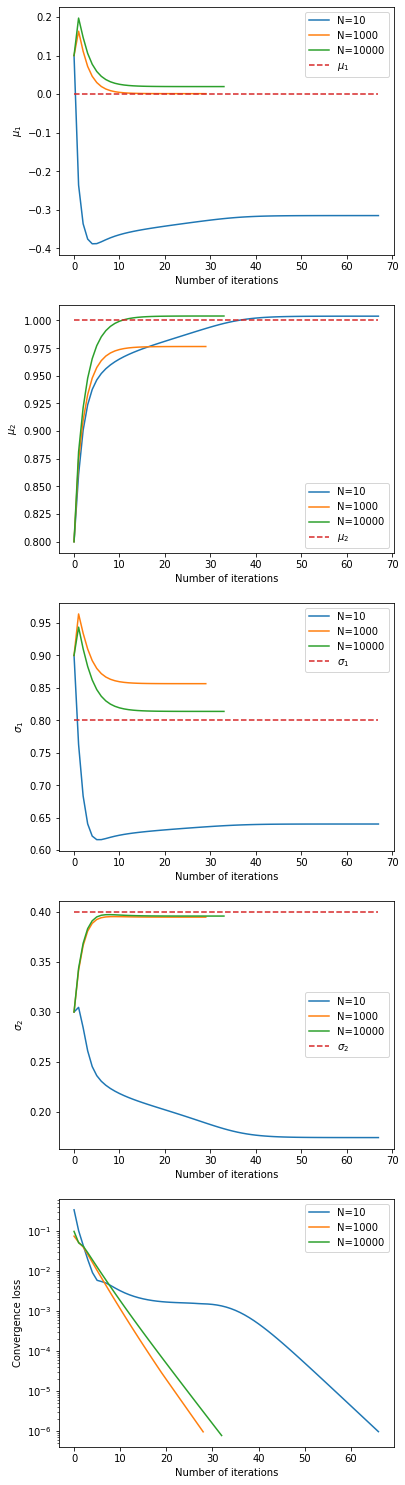

In [89]:
plotter_1(theta_est_1a,err_est_1a, theta_case_1)

We observe that for N=10000, our estimates are far from the true values. But for other values of N, we estimates that converge to the tru value after a finite number of iterations.

The semilog plot of convergence loss is linear implying an exponential decrease in its value with number of iterations.

#### (b) Use observations from case (ii) and assume that $\pi$ = 0.50 and initial estimates of $\mu_1$ = 0.1, $\mu_2$ = 0.8, $\sigma_1$ = 0.9, $\sigma_2$ = 0.3 

In [90]:
theta_case_2 = [0.1, 0, 1, 0.8, 0.4] # True values
theta_init = [0.5,0.1,0.8,0.9,0.3]
theta_est_1b = []
err_est_1b = []

for n_value in n_vector:
    X = generate_gmm_data(n_value, theta_case_2)
    #print(theta_init)
    theta_est, err_est = run_em_algorithm(X, theta_init ,flag_pi_update=False)
    theta_est_1b.append(theta_est)
    err_est_1b.append(err_est)
    print("For n =", n_value, "\t estimates =",\
          theta_est[-1])

For n = 10 	 estimates = [0.5        0.49189166 0.75906143 0.63120304 0.12802267]
For n = 1000 	 estimates = [0.5        0.74623193 1.03119608 0.68471256 0.2930398 ]
For n = 10000 	 estimates = [0.5        0.73111583 1.03836726 0.69265379 0.31160144]


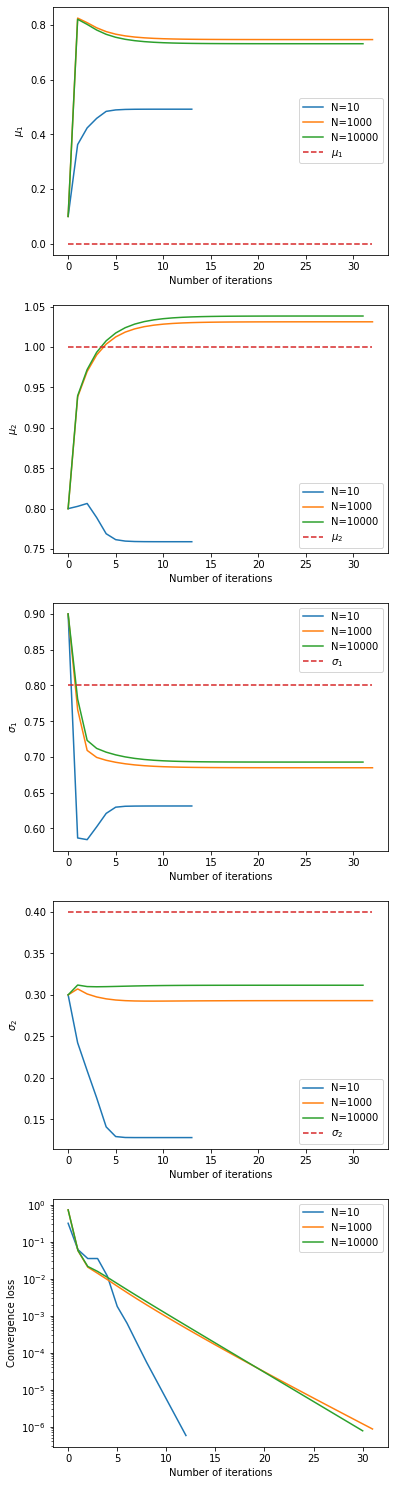

In [91]:
plotter_1(theta_est_1b,err_est_1b, theta_case_2)

Here the estimated parameters seem to diverge from the true value. Because the initialisation is very far from reality, the estimates are not good probably because it getss stuck in local minima.

#### (c) Use observations from case (i) and assume that $\pi$ = 0.10 and initial estimates of $\mu_1$ = 0.1, $\mu_2$ = 0.8, $\sigma_1$ = 0.9, $\sigma_2$ = 0.3 

In [92]:
theta_case_2 = [0.1, 0, 1, 0.8, 0.4] # True values
theta_init = [0.1,0.1,0.8,0.9,0.3]
theta_est_1c = []
err_est_1c = []

for n_value in n_vector:
    X = generate_gmm_data(n_value, theta_case_2)
    theta_est, err_est = run_em_algorithm(X, theta_init, flag_pi_update=False)
    theta_est_1c.append(theta_est)
    err_est_1c.append(err_est)
    print("For n =", n_value, "\t estimates =",\
          theta_est[-1])

For n = 10 	 estimates = [0.1        0.7268951  1.10159054 0.50826103 0.10170494]
For n = 1000 	 estimates = [0.1        0.88365622 1.06475365 0.56161648 0.18734707]
For n = 10000 	 estimates = [0.1        0.88051013 1.08815361 0.57667667 0.19082574]


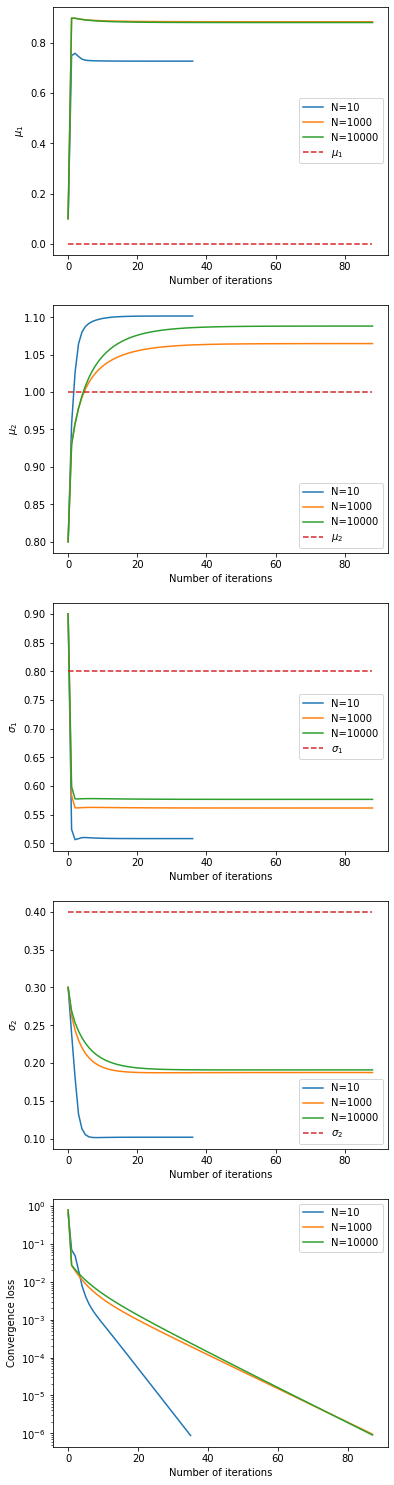

In [93]:
plotter_1(theta_est_1c,err_est_1c, theta_case_2)

This shows poor convergence to true values. Here value of pi is small and means that the 2 distributions are not separated well enough. Hence the generated data almost looks like a single Gaussian. If the value for pi is increased the results become similar to 1a with good estimates. If the ground truth means are spearated well, the algorithm gives good results again.

### Experiment 2: Effect of initialization
Note the format of reporting the estimates = $\theta$ = $[\pi \; \mu_1 \; \mu_2 \; \sigma_1 \; \sigma_2]$
Here, $\pi$ is also to be estimated.
<br><br>
#### (a) Use observations from case (i) and initial estimates of $\pi$ = 0.45, $\mu_1$ = 0.1, $\mu_2$ = 0.8, $\sigma_1$ = 0.9, $\sigma_2$ = 0.3 

In [96]:
theta_case_1 = [0.5, 0, 1, 0.8, 0.4] # True values
theta_init = [0.45,0.1,0.8,0.9,0.3]
theta_est_2a = []
err_est_2a = []

for n_value in n_vector:
    X = generate_gmm_data(n_value, theta_case_1)
    theta_est, err_est = run_em_algorithm(X, theta_init ,flag_pi_update=True)
    theta_est_2a.append(theta_est)
    err_est_2a.append(err_est)
    print("For n =", n_value, "\t estimates =",\
          theta_est[-1])

For n = 10 	 estimates = [ 0.40238847 -0.37927741  1.03684007  0.79421239  0.20570202]
For n = 1000 	 estimates = [ 0.50140844 -0.05166576  1.01129298  0.83420617  0.41748538]
For n = 10000 	 estimates = [ 0.49889415 -0.00414241  0.98619378  0.81726995  0.40724451]


In [123]:
def plotter_2(theta_est,error_est, true_theta):
  stack_1 = np.array(np.vstack(theta_est[0]))
  stack_2 = np.array(np.vstack(theta_est[1]))
  stack_3 = np.array(np.vstack(theta_est[2]))
  stack_4 = np.array(np.vstack(error_est[0]))
  stack_5 = np.array(np.vstack(error_est[1]))
  stack_6 = np.array(np.vstack(error_est[2]))


  fig, ax = plt.subplots(6,figsize=(6,10))
  fig.subplots_adjust(bottom = 14,top= 17)
  n = max(len(stack_1), len(stack_2), len(stack_3))

  ax[0].plot(stack_1[:,0], label = 'N=10')
  ax[0].plot(stack_2[:,0], label = 'N=1000')
  ax[0].plot(stack_3[:,0], label = 'N=10000')
  #ax[0].plot(np.ones(n)*true_theta[0], label = '$\pi$')
  ax[0].plot(np.ones(n)*true_theta[0], linestyle='dashed', label = '$\pi$')
  ax[0].set_xlabel('Number of iterations')
  ax[0].set_ylabel(r'$\pi$')
  #ax[0].set_title('N=10')
  ax[0].legend()

  ax[1].plot(stack_1[:,1], label = 'N=10')
  ax[1].plot(stack_2[:,1], label = 'N=1000')
  ax[1].plot(stack_3[:,1], label = 'N=10000')
  ax[1].plot(np.ones(n)*true_theta[1], linestyle='dashed', label = '$\mu_{1}$')
  ax[1].set_xlabel('Number of iterations')
  ax[1].set_ylabel(r'$\mu_{1}$')
  #ax[1].set_title('N=10')
  ax[1].legend()

  ax[2].plot(stack_1[:,2], label = 'N=10')
  ax[2].plot(stack_2[:,2], label = 'N=1000')
  ax[2].plot(stack_3[:,2], label = 'N=10000')
  ax[2].plot(np.ones(n)*true_theta[2], linestyle='dashed', label = '$\mu_{2}$')
  ax[2].set_xlabel('Number of iterations')
  ax[2].set_ylabel(r'$\mu_{2}$')
  #ax[2].set_title('N=10')
  ax[2].legend()

  ax[3].plot(stack_1[:,3], label = 'N=10')
  ax[3].plot(stack_2[:,3], label = 'N=1000')
  ax[3].plot(stack_3[:,3], label = 'N=10000')
  ax[3].plot(np.ones(n)*true_theta[3], linestyle='dashed', label = '$\sigma_{1}$')
  ax[3].set_xlabel('Number of iterations')
  ax[3].set_ylabel(r'$\sigma_{1}$')
  #ax[3].set_title('N=10')
  ax[3].legend()

  ax[4].plot(stack_1[:,4], label = 'N=10')
  ax[4].plot(stack_2[:,4], label = 'N=1000')
  ax[4].plot(stack_3[:,4], label = 'N=10000')
  ax[4].plot(np.ones(n)*true_theta[4], linestyle='dashed', label = '$\sigma_{2}$')
  ax[4].set_xlabel('Number of iterations')
  ax[4].set_ylabel(r'$\sigma_{2}$')
  #ax[4].set_title('N=10')
  ax[4].legend()

  ax[5].semilogy(stack_4, label = 'N=10')
  ax[5].semilogy(stack_5, label = 'N=1000')
  ax[5].semilogy(stack_6, label = 'N=10000')
  #ax[0].plot(np.ones(n)*true_theta[], linestyle='dashed', label = '$\mu_{1}$')
  ax[5].set_xlabel('Number of iterations')
  ax[5].set_ylabel('Convergence Loss')
  #ax[5].set_title('N=10')
  ax[4].legend()

  plt.show()


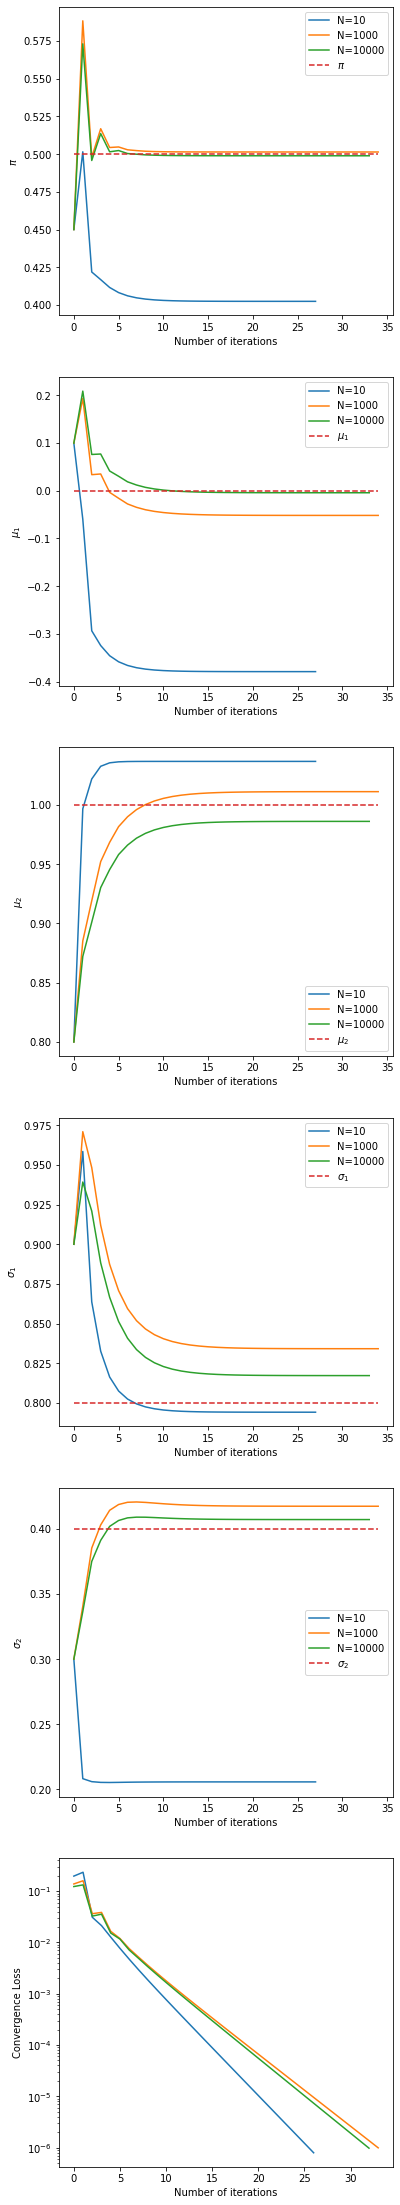

In [125]:
plotter_2(theta_est_2a,err_est_2a, theta_case_1)

Here, we observe good covergence of the parameters to the true values for all values of N. We also get a desirable semilog plot.

#### (b) Use observations from case (i) and initial estimates of $\pi$ = 0.45, $\mu_1$ = 0.8, $\mu_2$ = 0.1, $\sigma_1$ = 0.3, $\sigma_2$ = 0.9

In [110]:
theta_case_1 = [0.5, 0, 1, 0.8, 0.4] # True values
theta_init = [0.45,0.8,0.1,0.3,0.9]
theta_est_2b = []
err_est_2b = []

for n_value in n_vector:
    X = generate_gmm_data(n_value, theta_case_1)
    theta_est, err_est = run_em_algorithm(X, theta_init ,flag_pi_update=True)
    theta_est_2b.append(theta_est)
    err_est_2b.append(err_est)
    print("For n =", n_value, "\t estimates =",\
          theta_est[-1])

For n = 10 	 estimates = [0.52948889 0.98108957 0.23369479 0.21743888 0.69044573]
For n = 1000 	 estimates = [ 0.49998061  0.97145773 -0.05371403  0.41455524  0.77826315]
For n = 10000 	 estimates = [ 0.50034477  1.01225402 -0.01822874  0.39189483  0.8174727 ]


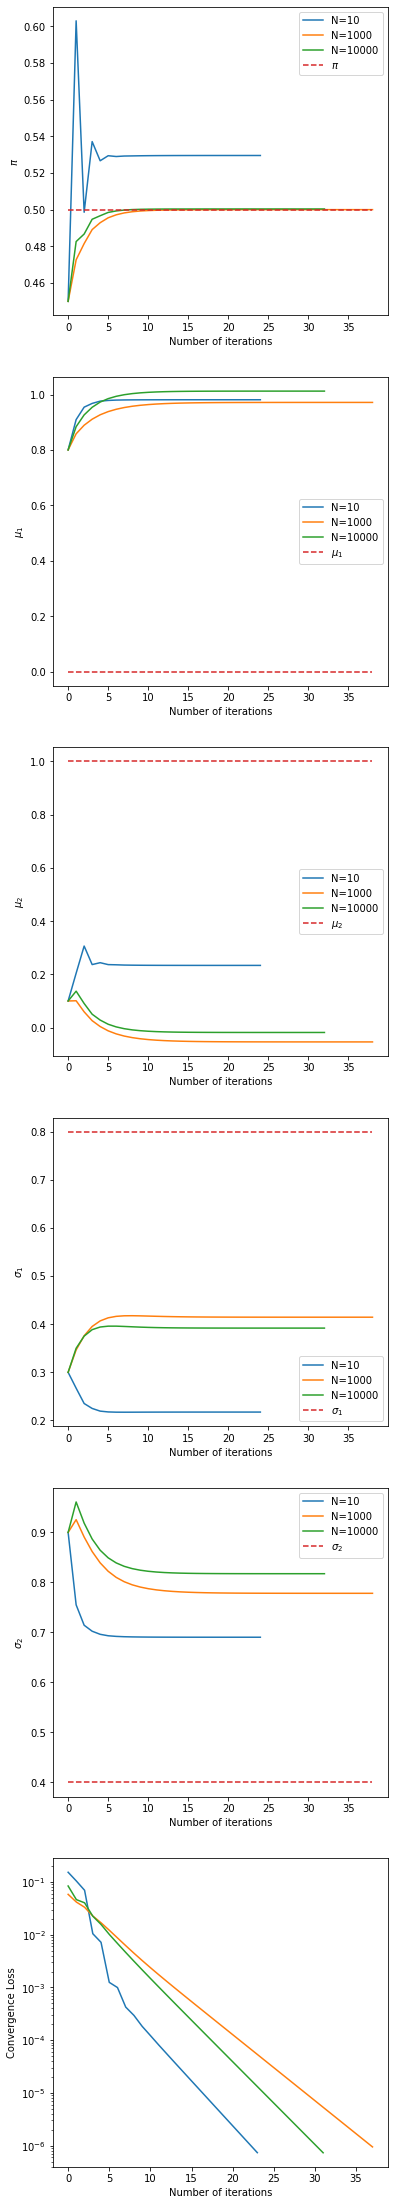

In [126]:
plotter_2(theta_est_2b,err_est_2b, theta_case_1)

Here we observe poor convergence to true values. Here our initial guess is the ground truth but with flipped parameters. Also pi has a value of 0.5. So the algorithm cannot really distinguish between the 2 underlying processes and messes up the ordering, though the estimated values are correct.

#### (c) Use observations from case (ii) and initial estimates of $\pi$ = 0.45, $\mu_1$ = 0.1, $\mu_2$ = 0.8, $\sigma_1$ = 0.9, $\sigma_2$ = 0.3

In [112]:
theta_case_2 = [0.1, 0, 1, 0.8, 0.4] # True values
theta_init = [0.45,0.1,0.8,0.9,0.3]
theta_est_2c = []
err_est_2c = []

for n_value in n_vector:
    X = generate_gmm_data(n_value, theta_case_2)
    theta_est, err_est = run_em_algorithm(X, theta_init ,flag_pi_update=True)
    theta_est_2c.append(theta_est)
    err_est_2c.append(err_est)
    print("For n =", n_value, "\t estimates =",\
          theta_est[-1])

For n = 10 	 estimates = [0.49829722 0.7492237  1.02052211 0.36074657 0.27634927]
For n = 1000 	 estimates = [0.48917013 0.79432858 1.03892637 0.71262452 0.32009353]
For n = 10000 	 estimates = [0.48799116 0.75617437 1.03399246 0.67503266 0.30860578]


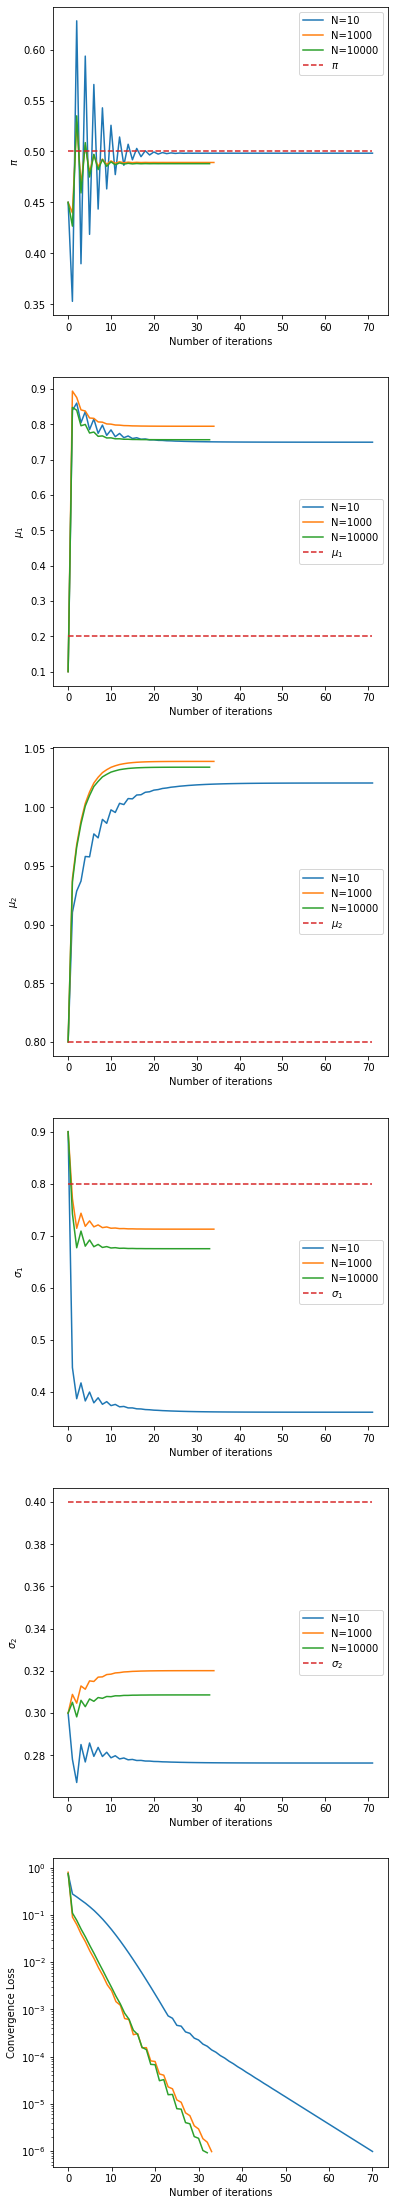

In [127]:
plotter_2(theta_est_2c,err_est_2c, theta_case_2)

This shows poor convergence as the value of pi heavily favours one process.

### Experiment 3: Impact of samples from distribution with closer mean
Note the format of reporting the estimates = $\theta$ = $[\pi \; \mu_1 \; \mu_2 \; \sigma_1 \; \sigma_2]$
<br><br>
#### Four Cases for Generating Observations, $x^{(i)}$ for Experiment 3

<br>
(i) $\pi = 0.50, \mu_1 = 0.0, \mu_2 = 1.0, \sigma_1 = 0.8, \sigma_2 = 0.4$<br><br>
(ii) $\pi = 0.50, \mu_1 = 0.2, \mu_2 = 0.8, \sigma_1 = 0.8, \sigma_2 = 0.4$<br><br>
(iii) $\pi = 0.50, \mu_1 = 0.4, \mu_2 = 0.6, \sigma_1 = 0.8, \sigma_2 = 0.4$<br><br>
(iv) $\pi = 0.50, \mu_1 = 0.48, \mu_2 = 0.52, \sigma_1 = 0.8, \sigma_2 = 0.4$<br><br>

Consider initialization $\pi = 0.45, \mu_1 = 0.5, \mu_2 = 0.5, \sigma_1 = 0.9, \sigma_2 = 0.3$ and $n = 5000$.

In [116]:
theta_case_1 = [0.5, 0, 1, 0.8, 0.4]
theta_case_2 = [0.5, 0.2, 0.8, 0.8, 0.4]
theta_case_3 = [0.5, 0.4, 0.6, 0.8, 0.4]
theta_case_4 = [0.5, 0.48, 0.52, 0.8, 0.4]

theta_init = [0.45, 0.5, 0.5, 0.9, 0.3]
n_value = 5000

In [117]:
X = generate_gmm_data(n_value, theta_case_1)
theta_est_3_1, err_est_3_1 = run_em_algorithm(X, theta_init ,flag_pi_update=True)
print("For case 1, \t estimates =",\
          theta_est_3_1[-1])

X = generate_gmm_data(n_value, theta_case_2)
theta_est_3_2, err_est_3_2 = run_em_algorithm(X, theta_init ,flag_pi_update=True)
print("For case 2, \t estimates =",\
          theta_est_3_2[-1])

X = generate_gmm_data(n_value, theta_case_3)
theta_est_3_3, err_est_3_3 = run_em_algorithm(X, theta_init ,flag_pi_update=True)
print("For case 3, \t estimates =",\
          theta_est_3_3[-1])

X = generate_gmm_data(n_value, theta_case_4)
theta_est_3_4, err_est_3_4 = run_em_algorithm(X, theta_init ,flag_pi_update=True)
print("For case 4, \t estimates =",\
          theta_est_3_4[-1])

For case 1, 	 estimates = [ 0.50067466 -0.00166276  1.00268457  0.81598165  0.397501  ]
For case 2, 	 estimates = [0.50041581 0.18090534 0.80938708 0.81989939 0.39941923]
For case 3, 	 estimates = [0.50069199 0.40608213 0.5978856  0.78592203 0.40321377]
For case 4, 	 estimates = [0.49974136 0.48703303 0.52805814 0.792629   0.40854595]


In [128]:

def plotter_3(theta_list,error_list, true_theta):
  stack_1 = np.array(np.vstack(theta_list))
  stack_2 = np.array(np.vstack(error_list))

  fig, ax = plt.subplots(2,3,figsize=(15,15))
  n = len(stack_1)

  ax[0][0].plot(stack_1[:,0])
  ax[0][0].plot(np.ones(n)*true_theta[0], linestyle='dashed', label = '$\pi$')
  ax[0][0].set_xlabel('Number of iterations')
  ax[0][0].set_ylabel(r'$\pi$')
  
  ax[0][1].plot(stack_1[:,1])
  ax[0][1].plot(np.ones(n)*true_theta[1], linestyle='dashed', label = '$\mu_{1}$')
  ax[0][1].set_xlabel('Number of iterations')
  ax[0][1].set_ylabel(r'$\mu_{1}$')
  
  ax[0][2].plot(stack_1[:,2])
  ax[0][2].plot(np.ones(n)*true_theta[2], linestyle='dashed', label = '$\mu_{2}$')
  ax[0][2].set_xlabel('Number of iterations')
  ax[0][2].set_ylabel(r'$\mu_{2}$')
  
  ax[1][0].plot(stack_1[:,3])
  ax[1][0].plot(np.ones(n)*true_theta[3], linestyle='dashed', label = '$\sigma_{1}$')
  ax[1][0].set_xlabel('Number of iterations')
  ax[1][0].set_ylabel(r'$\sigma_{1}$')
  
  ax[1][1].plot(stack_1[:,4])
  ax[1][1].plot(np.ones(n)*true_theta[4], linestyle='dashed', label = '$\sigma_{2}$')
  ax[1][1].set_xlabel('Number of iterations')
  ax[1][1].set_ylabel(r'$\sigma_{2}$')
  
  ax[1][2].semilogy(stack_2)
  #ax[1][2].plot(np.ones(n)*true_theta[2], linestyle='dashed', label = '$\pi$')
  ax[1][2].set_xlabel('Number of iterations')
  ax[1][2].set_ylabel('Convergence Loss')
  
  plt.show()

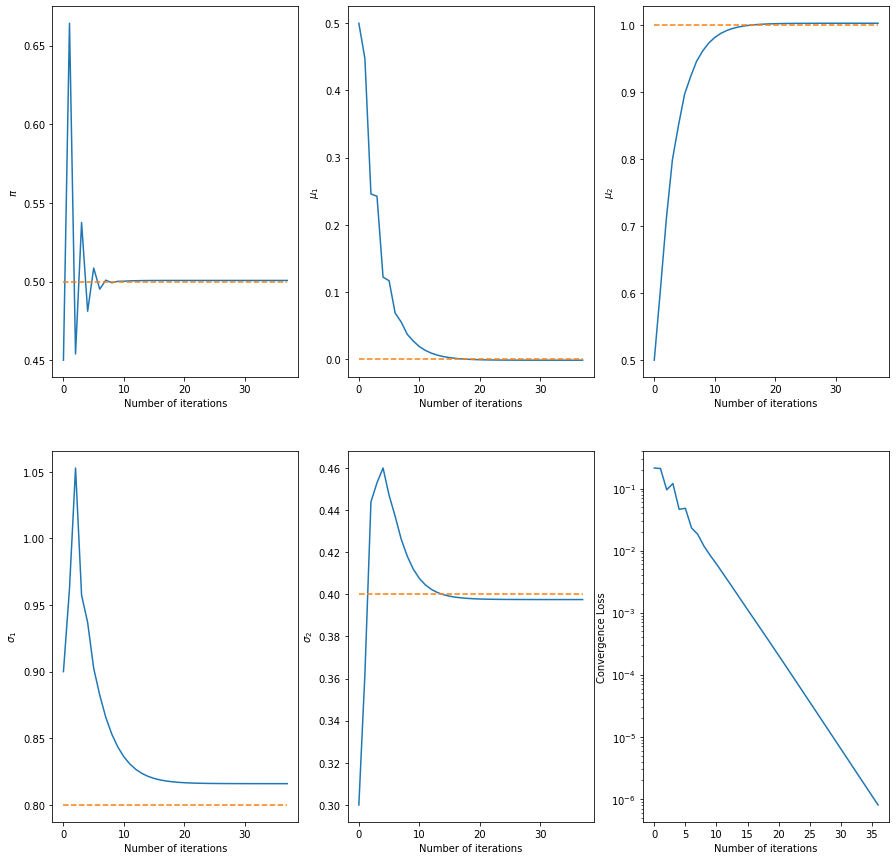

In [129]:
plotter_3(theta_est_3_1,err_est_3_1, theta_case_1)

This shows good convergence with the convergence plot also being desirable.

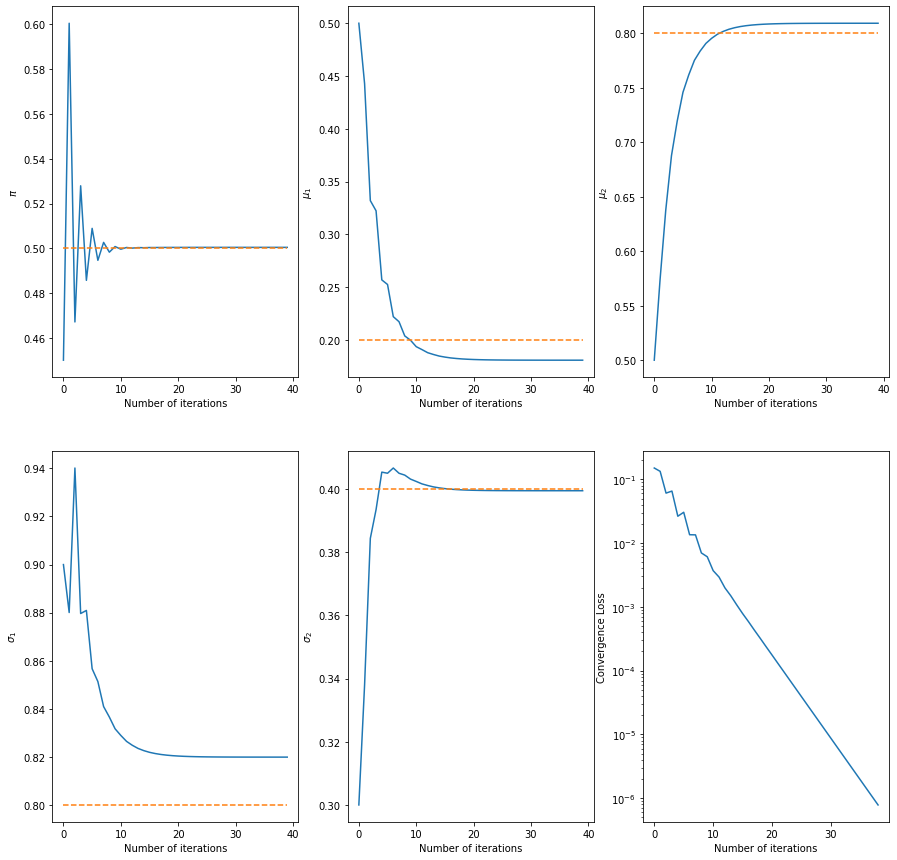

In [130]:
plotter_3(theta_est_3_2,err_est_3_2, theta_case_2)

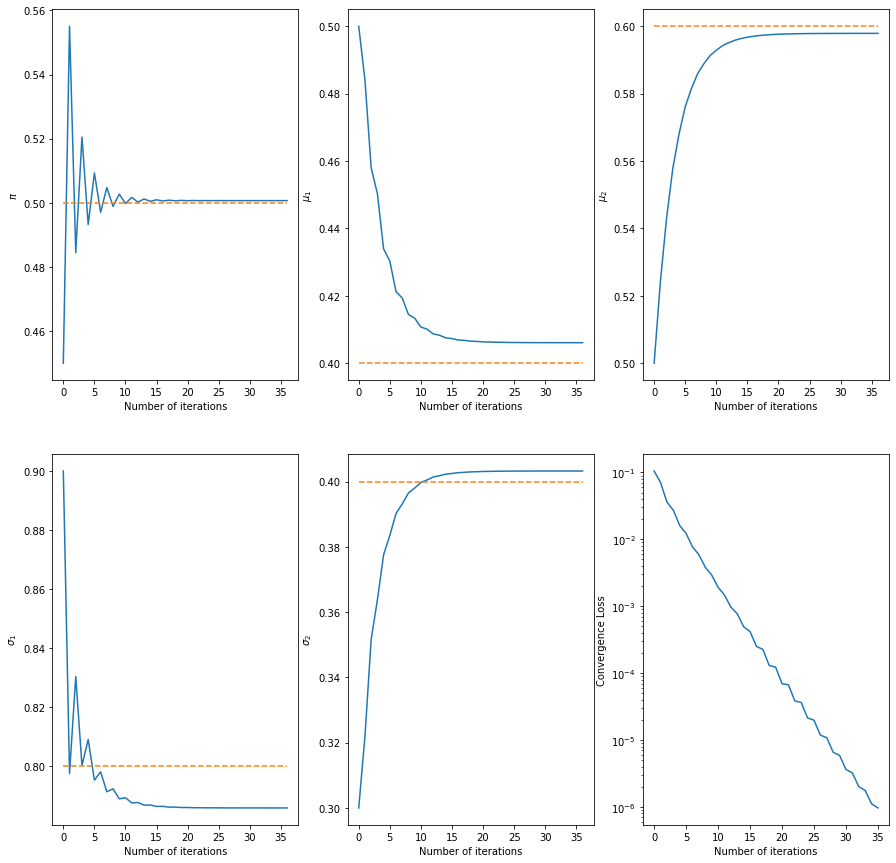

In [131]:
plotter_3(theta_est_3_3,err_est_3_3, theta_case_3)

This shows good convergence with the convergence plot also being desirable.

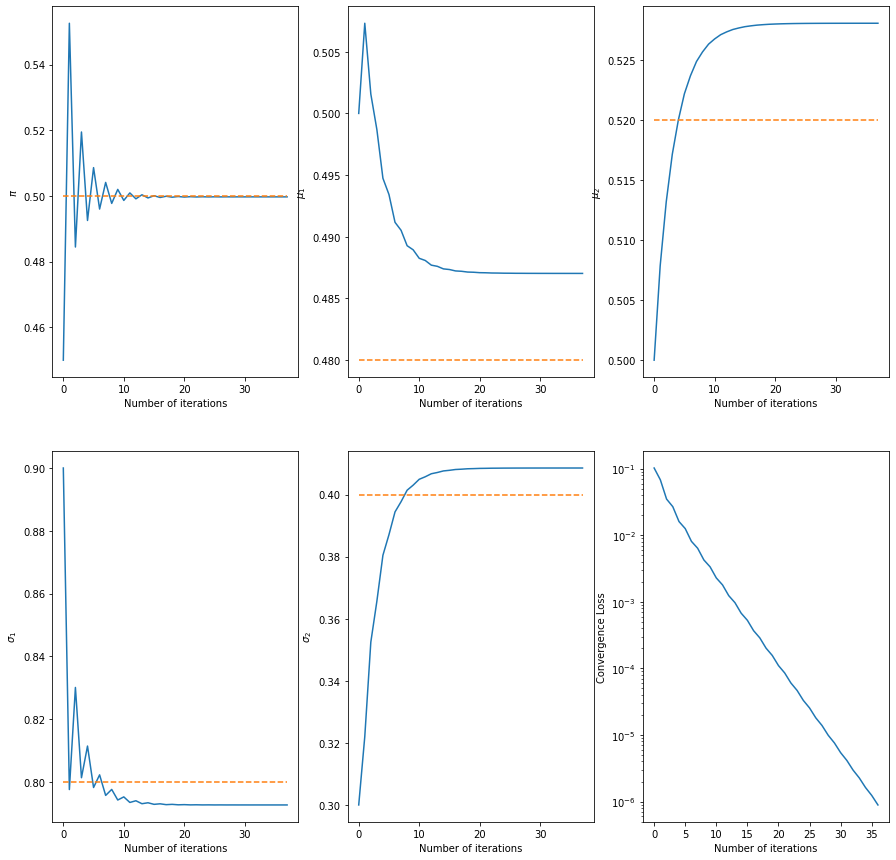

In [132]:
plotter_3(theta_est_3_4,err_est_3_4, theta_case_4)

This shows good convergence with the convergence plot also being desirable.

#### Observations

Clearly, as $\mu_1$ tends to $\mu_2$ in value, the EM algorithm fails to distinguish one from other and hence is not able to precisely determine their values and the two estimates of $\mu$ become virtually equal. This is most evident in case 3 and case 4 above.<br>
Note that since the estimates of $\sigma_1$ and $\sigma_2$ are still far from each other, they are still distinctly estimated with significantly higher accuracy than $\mu_1$ and $\mu_2$.